In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import RocCurveDisplay

In [3]:
tf.__version__

'2.17.1'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE/AI 201/FOR IN PERSON PRESENTATION/heart_dataset.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
# One Hot Encoding columns Sex, CP, FBS, RestECG, Exang, Slope, CA, and Thal
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5, 6, 8, 10, 11, 12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Feature Scaling
sc = StandardScaler()
X[:, [0, 3, 4, 7, 9]] = sc.fit_transform(X[:, [0, 3, 4, 7, 9]])

In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
ann = tf.keras.models.Sequential()

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [10]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6209 - loss: 1.2411
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6153 - loss: 0.8739
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6113 - loss: 0.8462
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6216 - loss: 0.7336
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.6834
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - loss: 0.6596
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.6172
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.6145
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - loss: 0.5821
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.5568
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5701
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [13]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy Score", accuracy_score(y_test, y_pred))

[[132  38]
 [ 27 181]]
Accuracy Score 0.828042328042328


In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.828042328042328
Precision Score: 0.828150135636997
Recall Score: 0.828042328042328
F1 Score: 0.8273825671802651


In [16]:
from sklearn.metrics import roc_curve, auc

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


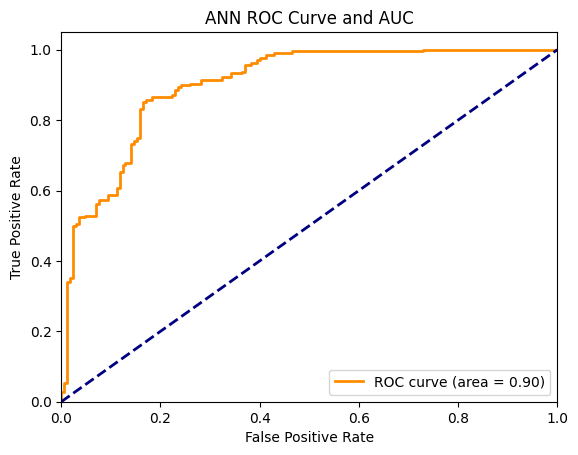

In [17]:
# Plotting the ROC Curve

# Compute predicted probabilities
y_pred_prob = ann.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve and AUC')
plt.legend(loc="lower right")
plt.show()